# 9.4 RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)

### 1. RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)
앞서 n-gram 언어 모델과 NNLM은 고정된 개수의 단어만을 입력으로 받아야한다는 단점이 있었습니다. 

하지만 시점(time step)이라는 개념이 도입된 RNN으로 언어 모델을 만들면 입력의 길이를 고정하지 않을 수 있습니다. 이처럼 RNN으로 만든 언어 모델을 RNNLM(Recurrent Neural Network Language Model)이라고 합니다.

RNNLM이 언어 모델링을 학습하는 과정을 보겠습니다. 이해를 위해 매우 간소화 된 형태로 설명합니다.
> 예문 : "what will the fat cat sit on"

예를 들어 훈련 코퍼스에 위와 같은 문장이 있다고 해봅시다. 언어 모델은 주어진 단어 시퀀스로부터 다음 단어를 예측하는 모델입니다. 아래의 그림은 RNNLM이 어떻게 이전 시점의 단어들과 현재 시점의 단어로 다음 단어를 예측하는지를 보여줍니다.

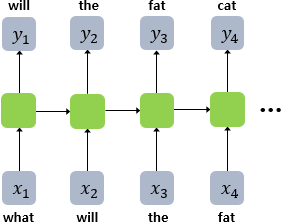

RNNLM은 기본적으로 예측 과정에서 이전 시점의 출력을 현재 시점의 입력으로 합니다. 
- RNNLM은 what을 입력받으면, will을 예측하고 
- 이 will은 다음 시점의 입력이 되어 the를 예측합니다. 
- 그리고 the는 또 다시 다음 시점의 입력이 되고 해당 시점에서는 fat을 예측합니다. 
- 그리고 이 또한 다시 다음 시점의 입력이 됩니다. 

결과적으로 세번째 시점에서 fat은 앞서 나온 what, will, the라는 시퀀스로 인해 결정된 단어이며, 네번째 시점의 cat은 앞서 나온 what, will, the, fat이라는 시퀀스로 인해 결정된 단어입니다.

사실 위 과정은 훈련이 끝난 모델의 테스트 과정 동안(실제 사용할 때)의 이야기입니다. 훈련 과정에서는 이전 시점의 예측 결과를 다음 시점의 입력으로 넣으면서 예측하는 것이 아니라, what will the fat cat sit on라는 훈련 샘플이 있다면, what will the fat cat sit 시퀀스를 모델의 입력으로 넣으면, will the fat cat sit on를 예측하도록 훈련됩니다. will, the, fat, cat, sit, on는 각 시점의 레이블입니다.

이러한 RNN 훈련 기법을 **교사 강요(teacher forcing)**라고 합니다. 교사 강요(teacher forcing)란,
- 테스트 과정에서 t 시점의 출력이 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법입니다. 
- 훈련할 때 교사 강요를 사용할 경우, 모델이 t 시점에서 예측한 값을 t+1 시점에 입력으로 사용하지 않고, t 시점의 레이블. 즉, 실제 알고있는 정답을 t+1 시점의 입력으로 사용합니다.

물론, 
- 훈련 과정에서도 이전 시점의 출력을 다음 시점의 입력으로 사용하면서 훈련 시킬 수도 있지만 
- 이는 한 번 잘못 예측하면 뒤에서의 예측까지 영향을 미쳐 훈련 시간이 느려지게 되므로 교사 강요를 사용하여 RNN을 좀 더 빠르고 효과적으로 훈련시킬 수 있습니다.

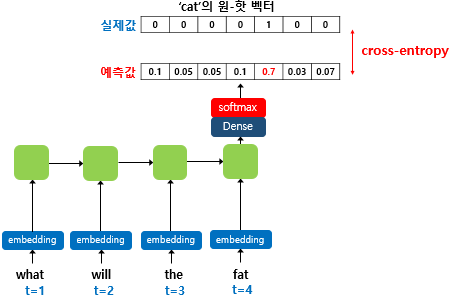

훈련 과정 동안 
- 출력층에서 사용하는 활성화 함수는 소프트맥스 함수입니다. 
- 그리고 모델이 예측한 값과 실제 레이블과의 오차를 계산하기 위해서 손실 함수로 크로스 엔트로피 함수를 사용합니다.

이해를 돕기 위해 앞서 배운 NNLM의 그림과 유사한 형태로 RNNLM을 다시 시각화해보겠습니다.

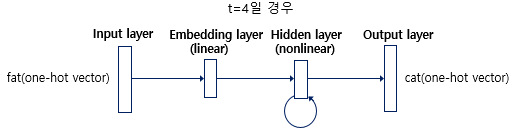

RNNLM의 구조를 보겠습니다. RNNLM은 위의 그림과 같이 총 4개의 층(layer)으로 이루어진 인공 신경망입니다. 

우선 입력층(input layer)을 봅시다. RNNLM의 현 시점(timestep)은 4로 가정합니다. 그래서 4번째 입력 단어인 fat의 원-핫 벡터가 입력이 됩니다.

이제 출력층(Output layer)를 봅시다. 모델이 예측해야하는 정답에 해당되는 단어 cat의 원-핫 벡터는 출력층에서 모델이 예측한 값의 오차를 구하기 위해 사용될 예정입니다. 그리고 이 오차로부터 손실 함수를 사용해 인공 신경망이 학습을 하게 됩니다. 조금 더 구체적으로 살펴보겠습니다.

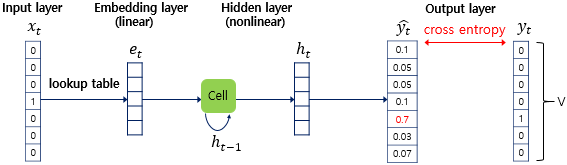

현 시점의 입력 단어의 
- 원-핫 벡터 $x_t$를 입력 받은 RNNLM은 우선 임베딩층(embedding layer)을 지납니다. 
- 이 임베딩층은 기본적으로 NNLM 챕터에서 배운 투사층(projection layer)입니다. 
- NNLM 챕터에서는 룩업 테이블을 수행하는 층을 투사층라고 표현했지만, 이미 투사층의 결과로 얻는 벡터를 임베딩 벡터라고 부른다고 NNLM 챕터에서 학습하였으므로, 앞으로는 임베딩 벡터를 얻는 투사층을 임베딩층(embedding layer)이라는 표현을 사용할 겁니다.

단어 집합의 크기가 V일 때, 임베딩 벡터의 크기를 M으로 설정하면, 
- 각 입력 단어들은 임베딩층에서 V × M 크기의 임베딩 행렬과 곱해집니다. 
- 여기서 V는 단어 집합의 크기를 의미합니다. 
- 만약 원-핫 벡터의 차원이 7이고, M이 5라면 임베딩 행렬은 7 × 5 행렬이 됩니다. 

그리고 이 임베딩 행렬은 역전파 과정에서 다른 가중치들과 함께 학습됩니다. 이는 NNLM 챕터에서 이미 배운 개념입니다.

임베딩층 : $e_t=lookup(x_t)$
여기서부터는 다시 RNN을 복습하는 것과 같습니다.

이 임베딩 벡터는 은닉층에서 이전 시점의 은닉 상태인 ht−1과 함께 다음의 연산을 하여 현재 시점의 은닉 상태 ht를 계산하게 됩니다.

은닉층 : $h_t=tanh(W_xe_t+W_hh_{t−1}+b)$

출력층에서는 활성화 함수로 소프트맥스(softmax) 함수를 사용하는데, V차원의 벡터는 소프트맥스 함수를 지나면서 각 원소는 0과 1사이의 실수값을 가지며 총 합은 1이 되는 상태로 바뀝니다. 이렇게 나온 벡터를 RNNLM의 t시점의 예측값이라는 의미에서 $\hat{y}_t$라고 합시다. 이를 식으로 표현하면 아래와 같습니다.

출력층 : $\hat{y}_t=softmax(W_yh_t+b)$

벡터 $\hat{y}_t$의 각 차원 안에서의 값이 의미하는 것은 이와 같습니다. $\hat{y}_t$의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 다음 단어일 확률을 나타냅니다. 그리고 $\hat{y}_t$는 실제값. 즉, 실제 정답에 해당되는 단어인 원-핫 벡터의 값에 가까워져야 합니다. 실제값에 해당되는 다음 단어를 y라고 했을 때, 이 두 벡터가 가까워지게 하기위해서 RNNLM는 손실 함수로 cross-entropy 함수를 사용합니다. 그리고 역전파가 이루어지면서 가중치 행렬들이 학습되는데, 이 과정에서 임베딩 벡터값들도 학습이 됩니다.

룩업 테이블의 대상이 되는 테이블인 임베딩 행렬을 E라고 하였을 때, 결과적으로 RNNLM에서 학습 과정에서 학습되는 가중치 행렬은 다음의 $E,W_x,W_h,W_y$ 4개 입니다. 뒤의 글자 단위 RNN 챕터에서 RNN 언어 모델을 구현해보면서 훈련 과정과 테스트 과정의 차이를 이해해보겠습니다.